In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

In [3]:
X, y = make_blobs(centers=3, random_state=42)

In [4]:
import seaborn as sns

In [5]:
X.shape

(100, 2)

<AxesSubplot:>

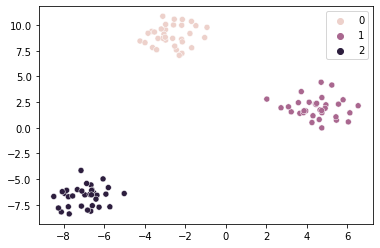

In [6]:
sns.scatterplot(X[:,0], X[:,1], hue=y)

In [7]:
from sklearn.cluster import KMeans

<AxesSubplot:>

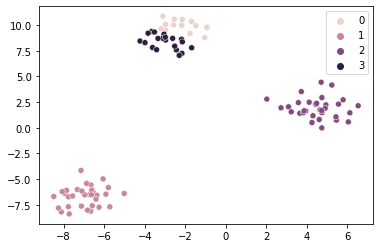

In [8]:
model = KMeans(n_clusters=4)

model.fit(X)

y_gen = model.labels_

sns.scatterplot(X[:, 0], X[:, 1], hue=y_gen)

In [9]:
model.cluster_centers_

array([[-2.20127958,  9.94858935],
       [-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013],
       [-2.95660471,  8.30877152]])

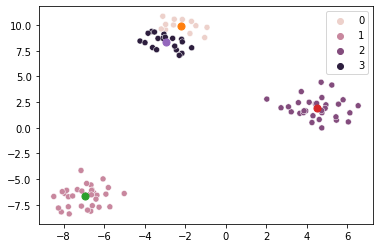

In [10]:
sns.scatterplot(X[:,0], X[:, 1], hue=y_gen)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s=50)

## Custom KMeans

In [11]:
import random

In [12]:
class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
        
    def distance(self, point):
        return np.sqrt(np.sum((point - self.center) ** 2))
    
class CustomKMeans:
    
    def __init__(self, n_clusters=3, max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center=random.choice(X))
            clusters.append(cluster)
            
        for i in range(self.max_iters):
            
            labels = []
            
            for point in X:
                
                distances = []
                for cluster in clusters:
                    distances.append(cluster.distance(point))
                
                closest_index = np.argmin(distances)
                closest_cluster = clusters[closest_index]
                closest_cluster.points.append(point)
                labels.append(closest_index)
            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis=0)
        self.labels_ = labels
        print(labels)
        self.cluster_centers_ = [cluster.center for cluster in clusters]

In [13]:
model = CustomKMeans(n_clusters=3)

model.fit(X)

[0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2]


<AxesSubplot:>

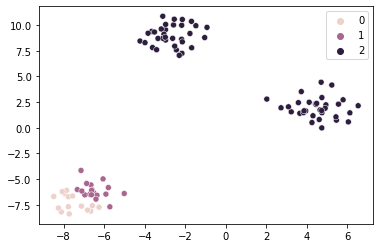

In [14]:
sns.scatterplot(X[:,0], X[:,1], hue=model.labels_)